## Exercise 10.1 (search)

We want to find the largest and smallest values in a long list of numbers. Implement
two algorithms, based on:

1. Iterating over the list entries; and 
1. First applying a built-in sort operation to the list.

Encapsulate each algorithm in a function. To create lists of numbers for testing use, for example:
```python
x = np.random.rand(1000)
```

### Solution

We first create the list of random numbers

In [1]:
import numpy as np
x = np.random.rand(1000) #np array

#### Approach 1

In [2]:

def min_max1(x):
    
    if  not x.any(): #if x is completely empty, then it returns false, so not false goes to True..
        #.any() returns true if any of the elements are true.
        return("list is empty")
    x = x.copy()
    x_min = x[0]
    x_max = x[0]
    for i in range(1,len(x)): #already have the 0th index in place.
        if x[i]< x_min:
            x_min = x[i]
        elif x[i]> x_max: #make it exclusive, avoids having to check both if statements.
            x_max = x[i]
          
    return  x_min, x_max
    
print(min_max1(x))


(0.0004156248652812389, 0.9992915351233779)


#### Approach 2

In [3]:
def min_max2(x):
    #compare pairwise then recurse
    x= sorted(x) #timsort
    return x[0],x[-1]

print(min_max2(x))

(0.0004156248652812389, 0.9992915351233779)


In [4]:
assert min_max1(x) == min_max2(x)

In practice, we would use the the NumPy function:

In [5]:
print(np.min(x), np.max(x))

joe= np.random.rand(10000)
%time min_max1(joe) #9.97 milliseconds
%time min_max2(joe) #998 microseconds

0.0004156248652812389 0.9992915351233779
Wall time: 11 ms
Wall time: 7.98 ms


(5.6654511679132824e-05, 0.999459835263502)

## Exercise 10.2 (Newton's method for root finding)

### Background

Newton's method can be used to find a root $x$ of a function $f(x)$ such that
$$
f(x) = 0
$$
A Taylor series expansion of $f$ about $x_{i}$ reads:
$$
f(x_{i+1}) = f(x_{i}) + \left. f^{\prime} \right|_{x_{i}} .(x_{i+1} - x_{i}) +  O((x_{i+1} - x_{i})^{2})
$$

If we neglect the higher-order terms and set $f(x_{i+1})$ to zero, we have Newton's method:
\begin{align}
x_{i + 1} &= - \frac{f(x_{i})}{f^{\prime}(x_{i})} + x_{i}
\\
x_{i} &\leftarrow x_{i+1}
\end{align}
In Newton's method, the above is applied iteratively until $\left|f(x_{i + 1})\right|$ is below a tolerance value.
$$x_{i+1}$$ is just $$x_{i} + h$$

### Task

Develop an implementation of Newton's method, with the following three functions in your implementation:
```python
def newton(f, df, x0, tol, max_it):
    # Implement here
    
    return x1  # return root
```
where `x0` is the initial guess, `tol` is the stopping tolerance, `max_it` is the maximum number 
of iterations, and 
```python
def f(x):
    # Evaluate function at x and return value


def df(x):
    # Evaluate df/dx at x and return value

```

Your implementation should raise an exception if the maximum number of iterations (`max_it`)
is exceeded.

Use your program to find the roots of:
$$
f(x) = \tan(x) - 2x
$$
between $-\pi/2$ and $\pi/2$. Plot $f(x)$ and $f^{\prime}(x)$ on the same graph, 
and show the roots computed by Newton's method.

Newton's method can be sensitive to the starting value. Make sure you find the root around $x = 1.2$. What happens if you start at $x = 0.9$? It may help to add a print statement in the iteration loop, showing $x$ and $f$ at each iteration.


### Extension (optional)

For a complicated function we might not know how to compute the derivative, or it may be very complicated
to evaluate. Write a function that computes the *numerical derivative* of $f(x)$ by evaluating 
$(f(x + dx) - f(x - dx)) / (2dx)$, where $dx$ is small. How should you choose $dx$?

### Solution

We first implement a Newton solver function:

In [6]:
import numpy as np

def newton(f, df, x, tol=1e-8, max_it=20):
    """Find root of equation defined by function f(x) where df(x) is
    first derivative and x is the initial guess.Optional arguments tol 
    (tolerance) and max_it (maximum number of iterations)"""

    
    for i in range(max_it):
        
        x = -f(x)/df(x) +x
        #print(x)
        if abs(f(x))<tol:

            return x
    
    #raise ValueError("Max number of iterations exceeded. X may have diverged.")
    return "X diverged to", x

We now provide implementations of `f` and `df`, and find the roots:

In [22]:
def f(x):
    return np.tan(x)-2*x

def df(x):
    return (1/(np.cos(x))**2) - 2

In [8]:
for i in np.arange(-1.6,1.61,0.2): #roughly spanning the range between +-pi/2

        print(i, newton(f,df,i))
        
#we therefore find the roots are +-1.1655... and 0.
#or we could identify the unique roots by iterating through them and rounding them to something like 5 decimal places

-1.6 ('X diverged to', -19078.552127169503)
-1.4000000000000001 -1.165561185207641
-1.2000000000000002 -1.1655611852072116
-1.0000000000000002 -1.1655611852078998
-0.8000000000000003 ('X diverged to', 6518656.847545927)
-0.6000000000000003 -1.3338482607924002e-13
-0.40000000000000036 1.828453973515623e-12
-0.2000000000000004 1.3499587596865412e-21
-4.440892098500626e-16 0.0
0.1999999999999995 -1.3499587596865412e-21
0.39999999999999947 -1.828453973515623e-12
0.5999999999999992 1.3338482607924002e-13
0.7999999999999994 ('X diverged to', 21485333.609621704)
0.9999999999999996 1.1655611852078998
1.1999999999999993 1.1655611852072116
1.399999999999999 1.165561185207641
1.5999999999999992 ('X diverged to', 295.80419501128125)


We can visualise the result:

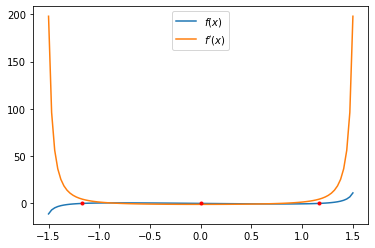

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot f and df/dx
x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), label="$f^{\prime}(x)$")
plt.legend(loc = 'best') #you need to add a legend for the labels to show up

# Add location of roots to plot
root1 = newton(f,df,1.2)
plt.plot(root1, f(root1), marker='o', markersize=3, color="red")
root2 = newton(f,df,-1.2)
plt.plot(root2, f(root2), marker='o', markersize=3, color="red")
#root 3 is 0.
plt.plot(0,0,marker='o', markersize=3, color="red")

#N.B. the Newton Raphson method is equivalent to finding the tangent intersection with the x-axis for every iteration.

plt.show()

For the extension, we can replace the function `df(x)` with a new version

In [68]:
def df(x):
    # Try changing dx to 1e-15 or smaller -> I find that if dx is too small it leads to division by zero!
    dx = 1e-9 #1e-6 - 1e-9 is the ideal region for dx
    return (f(x+dx)-f(x-dx))/(2*dx)
   

#be super careful with brackets!!!!!!!!!!!!!!!
#also note that the method is prone to divergence at starting points located near turning points where the derivative is zero!

In [37]:
# Find roots near -1.2, 0.1, and 1.2
xroots = np.array((newton(f, df, -1.2),
                   newton(f, df, 0.1),
                   newton(f, df, 1.2)))
assert np.isclose(xroots, [-1.16556119e+00, 2.08575213e-10, 1.16556119e+00]).all()

1.1655611852072119


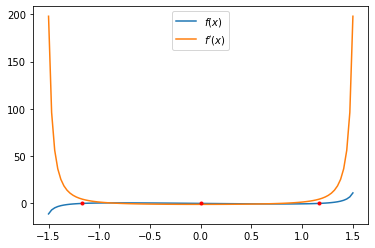

In [69]:
print(newton(f,df,1.2))
x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), label="$f^{\prime}(x)$")
plt.legend(loc = 'best') #you need to add a legend for the labels to show up

# Add location of roots to plot
root1 = newton(f,df,1.2)
plt.plot(root1, f(root1), marker='o', markersize=3, color="red")
root2 = newton(f,df,0.1)
plt.plot(root2, f(root2), marker='o', markersize=3, color="red")
root3 = newton(f,df,-1.2)
plt.plot(root3, f(root3), marker='o', markersize=3, color="red")
plt.show()


In practice, we could use the Newton function `scipy.optimize.newton` from SciPy (http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) rather than implementing our own function.

## Exercise 10.3 (optional, low pass image filter)

Images files can be loaded and displayed with Matplotlib. An imported image is stored as a 
three-dimensional NumPy array of floats. The shape of the array is `[0:nx, 0:ny, 0:3]`. 
where `nx` is the number of pixels in the $x$-direction, `ny` is the number of pixels in the $y$-direction,
and the third axis is for the colour component (RGB: red, green and blue) intensity. See http://matplotlib.org/users/image_tutorial.html for more background.

Below we fetch an image and display it:

<class 'numpy.ndarray'>
Image array shape: (375, 500, 3)


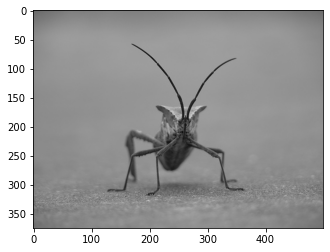

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import image
img = mpimg.imread('https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/master/_images/stinkbug.png')
#if it's local you need to add r before the string otherwise it gets misinterpreted
# Check type and shape
print(type(img))
print("Image array shape: {}".format(img.shape))

# Display image
plt.imshow(img);

The task is to write a *function* that applies a particular low-pass filter algorithm to an image array 
and  returns the  filtered image. With this particular filter, the value of a pixel in the filtered image 
is equal to the average value of the four neighbouring pixels in the original image. For the `[i, j, :]` pixel, 
the neighbours are  `[i, j+1, :]`, `[i, j-1, :]`, `[i+1, j, :]` and  `[i-1, j, :]`. 

Run the filter algorithm multiple times on the above image to explore the effect of the filter.

*Hint*: To create a NumPy array of zeros, `B`,  with the same shape as array `A`, use:
```python
import numpy as np
B = np.zeros_like(A)
```

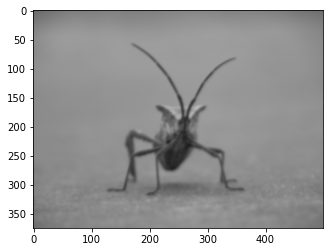

In [120]:
import numpy as np
filteroni = np.zeros_like(img)

#test = np.array([[1,1,1],[1,1,1]]) note to self: if constructing a matrix, you need an extra set of square brackets.
#also note that without the inline command, cells below would affect the plot as it would be a live object in memory.

#the image is stored as an array of 375 rows that are 500 long.
#each element is then an array of length 3 representing rgb
#so overall it's actually a 3-dimensional array.

#not every pixel has four surrounding pixels so to prevent indexing errors, I had to handle the different types separately.
#I could have done try-except control statements instead, but I don't think it would be much quicker, perhaps even slower.
#(probably easier to read though)
def filter(img):
    dimensions = np.shape(img)

    #bottom and top edges
    for j in range(1,dimensions[1]-1): #columns
        for k in range(dimensions[2]):

            filteroni[0][j][k]= (img[0][j+1][k]+img[0][j-1][k]+img[1][j][k])/3 #topline of image excluding corners
            filteroni[dimensions[0]-1][j][k]= (img[dimensions[0]-1][j+1][k]+img[dimensions[0]-1][j-1][k]+img[dimensions[0]-2][j][k])/3#bottom line, excluding corners

    #left and right edges
    for i in range(1,dimensions[0]-1): #rows
        for k in range(dimensions[2]):

            filteroni[i][0][k]= (img[i+1][0][k]+img[i-1][0][k]+img[i][1][k])/3 #left
            filteroni[i][dimensions[1]-1][k]= (img[i+1][dimensions[1]-1][k]+img[i-1][dimensions[1]-1][k]+img[i][dimensions[1]-2][k])/3 #Right

    #corners
    for k in range(dimensions[2]):
        filteroni[0][0][k]= (img[1][0][k]+img[0][1][k])/2 #top left
        filteroni[0][dimensions[1]-1][k]= (img[0][dimensions[1]-2][k]+img[1][dimensions[1]-1][k])/2 #top right
        filteroni[dimensions[0]-1][0][k]= (img[dimensions[0]-2][0][k]+img[dimensions[0]-1][1][k])/2 #bottom left
        filteroni[dimensions[0]-1][dimensions[1]-1][k]= (img[dimensions[0]-2][dimensions[1]-1][k]+img[dimensions[0]-1][dimensions[1]-2][k])/2 #bottom right

    #central block
    for i in range(1,dimensions[0]-1): #375, rows
        for j in range(1,dimensions[1]-1): #500, columns
            for k in range(dimensions[2]):
                filteroni[i][j][k]= (img[i][j+1][k]+img[i][j-1][k]+img[i+1][j][k]+img[i-1][j][k])/4
    return filteroni

filtered = filter(filter(filter(filter(img))))
plt.imshow(filtered);
#N.B. the filter's blurring/smoothing effects are quite obvious on this particular picture because of how thin the antennae are.
#there's a lot of contrast against the background.